# Data input

First we need to import libraries which we will use in this project. 

In [1]:
#Importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU
from tensorflow.keras.activations import relu, sigmoid, hard_sigmoid, tanh, selu

Now we need to imput our dataset for cardio which we will use to create the best model for future prediction.

In [2]:
#Importing dataset with features and target variable
try:        
    df = pd.read_csv('cardio_train.csv', sep = ';')
except IOError:
    print("Such file doesn't exist!")
else:
    df.head()

In [3]:
 df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


We will drop id variable because it dosen't have effect on our prediction model.

In [4]:
#We will eliminate id it doesn't have effect of our prediction
df.drop('id', axis = 1, inplace = True)

Let see if there null or NA values. This is important step because we need to handle this values if we want good prediction model.

In [5]:
#We will examine the null and missing values
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Next step is to see if there duplicates in this dataset. If we have it we need to drop them. 

In [7]:
#Now we need to drop duplicates from our dataset
df = df.drop_duplicates()

After this steps we can see the summary statistics for each variable in this dataset. It is important bacuse we can see the behaviour of each variable.

In [8]:
summary = df.describe()
summary

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Now we will create correlation matrix. Correlation between two variable can be between [-1,1].
If corr is close to -1 or 1, it means that this variables are correlated. e.c one depends on other. 
If the correlation is close to 0 it means that vaariables don't have relationship between them.

In [9]:
#Correlation matrix to see relationship between variables
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022763,-0.081546,0.053697,0.020765,0.017647,0.154432,0.098704,-0.047650,-0.029735,-0.009918,0.238189
gender,-0.022763,1.000000,0.499080,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037
height,-0.081546,0.499080,1.000000,0.290983,0.005488,0.006151,-0.050225,-0.018592,0.188003,0.094425,-0.006569,-0.010871
weight,0.053697,0.155320,0.290983,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599
ap_hi,0.020765,0.005996,0.005488,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475
ap_lo,0.017647,0.015241,0.006151,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717
cholesterol,0.154432,-0.035915,-0.050225,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119
gluc,0.098704,-0.020558,-0.018592,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268
smoke,-0.047650,0.338131,0.188003,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533
alco,-0.029735,0.170950,0.094425,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366


# Data Visualization

We will represent the histograms and box plots of continuous variables. 
Then we will see if there are outliers and how to handle with them.
Histogram is good statistical graph to see the distribution of variable.
If variable has bell shape it means that variable is good distributed. 
If not we need to correct it dropping outliers or with some transormation.

### Age

First we need to examine the variable age which is given in days not in years.

In [10]:
def boxplot_figure(data,title = 'title',x_label = 'x_label' ,y_label = 'y_label'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(data)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    plt.show()

Text(0.5, 1.0, 'Histogram of Age')

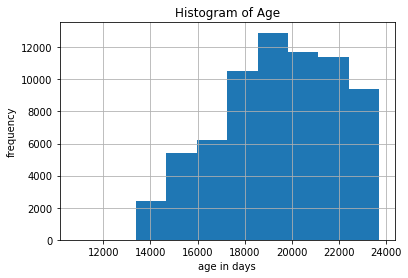

In [11]:
df.age.hist()
plt.xlabel('age in days')
plt.ylabel('frequency')
plt.title('Histogram of Age')

Now we will see if there some outliers. For that we will use boxplot. 

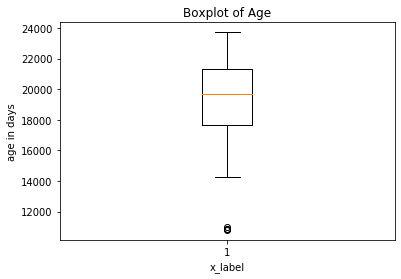

In [12]:
boxplot_figure(data = df.age,title = 'Boxplot of Age',x_label = 'x_label' ,y_label = 'age in days')

We will define the function for calculating the lower and upper bound of boxplot. Outside this bounds the data are outliers.

In [13]:
#We will define the function for calculating bounds of box plot
def bound_lower_upper(q_1,q_3):
    IQR = q_3 - q_1
    b_1 = q_1 - 1.5*IQR
    b_2 = q_3 + 1.5*IQR
    return b_1, b_2, IQR

Now we will calculate how much outliers we have in variable age.

In [14]:
bound_age = bound_lower_upper(summary['age'][4],summary['age'][6])
#Number of outliers
df_age_outlier = df[(df['age'] < bound_age[0]) | (df['age'] > bound_age[1])]
df_age_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6219,10878,1,175,59.0,120,80,1,1,0,0,1,0
22343,10798,2,175,92.0,100,60,1,1,0,0,1,0
30666,10859,1,159,59.0,120,80,1,1,0,0,1,0
55905,10964,1,160,59.0,110,70,1,1,0,0,1,0


We have 4 outliers in variable age. 
We will handle with this outlier values cupping them to the lower bound value.

In [15]:
#We will handle with this outlier values cupping them to the bounds values
for number in df_age_outlier['age']:
    df['age'].replace(number, bound_age[0], inplace = True)

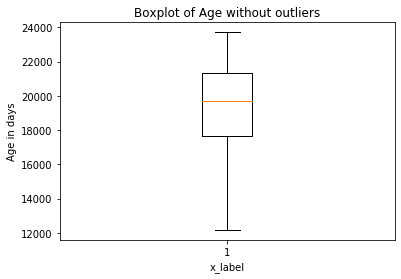

In [16]:
boxplot_figure(data = df.age,title = 'Boxplot of Age without outliers',x_label = 'x_label' ,y_label = 'Age in days')

### Height

Now we need to examine the variable height which data are given in cm.
The histogram of this variable are given bellow:

Text(0.5, 1.0, 'Histogram of Height')

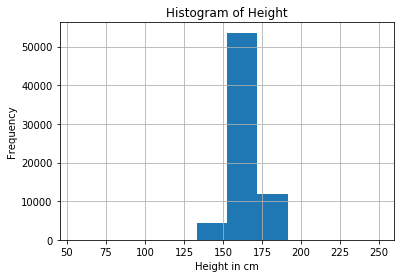

In [17]:
df.height.hist()
plt.xlabel('Height in cm')
plt.ylabel('Frequency')
plt.title('Histogram of Height')

Now we will see if there some outliers. For that we will use boxplot of height.

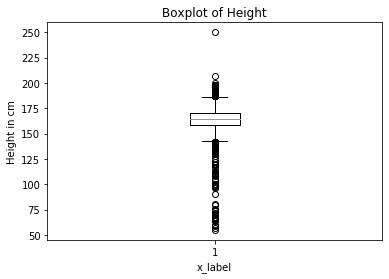

In [18]:
boxplot_figure(data = df.height,title = 'Boxplot of Height',x_label = 'x_label' ,y_label = 'Height in cm')

Now we need to calculate how much outliers we have in variable height. 

In [19]:
bound_height = bound_lower_upper(summary['height'][4],summary['height'][6])
#Number of outliers
df_height_outlier = df[(df['height'] < bound_height[0]) | (df['height'] > bound_height[1])]
df_height_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
62,20330.0,2,187,115.0,130,90,1,1,0,1,1,0
76,20397.0,2,188,105.0,120,80,1,1,0,0,1,1
224,21800.0,2,76,55.0,120,80,1,1,0,0,1,0
249,18220.0,1,142,61.0,120,80,1,1,0,0,1,0
781,23301.0,1,141,60.0,120,80,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69430,19040.0,1,140,52.0,150,80,2,1,0,0,1,1
69475,19261.0,2,187,73.0,120,80,1,3,0,0,1,0
69589,18286.0,2,192,83.0,110,70,1,1,0,1,0,0
69784,17541.0,1,141,44.0,100,70,1,1,0,0,1,0


Since we have 519 outliers. We will handle with this outlier values cupping them to the bounds values. 

In [20]:
#We will handle with this outlier values cupping them to the bounds values
for number in df_height_outlier['height']:
    if number < bound_height[0]:
        df['height'].replace(number, bound_height[0], inplace = True)
    else:
        df['height'].replace(number, bound_height[1], inplace = True)

After handling with outliers the boxplot of variable height is given bellow:

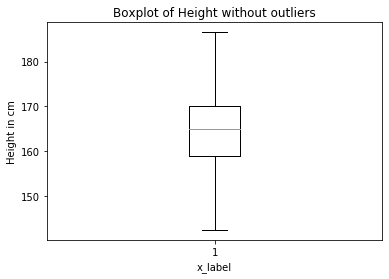

In [21]:
boxplot_figure(data = df.height,title = 'Boxplot of Height without outliers',x_label = 'x_label' ,y_label = 'Height in cm')

### Weight

Next variable which we need to examine is the weight. The histogram of weight is given bellow.

Text(0.5, 1.0, 'Histogram of Weight')

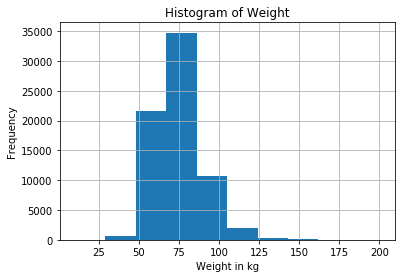

In [22]:
df.weight.hist()
plt.xlabel('Weight in kg')
plt.ylabel('Frequency')
plt.title('Histogram of Weight')

Since the distribution of variable weight is right skewed we need to try some transormation to change the distribution. 
We will use logarithm transormation as follows:

In [23]:
df['weight_log'] = np.log(np.log(df.weight))
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log
0,18393.0,2,168.0,62.0,110,80,1,1,0,0,1,0,1.417583
1,20228.0,1,156.0,85.0,140,90,3,1,0,0,1,1,1.491251
2,18857.0,1,165.0,64.0,130,70,3,1,0,0,0,1,1.425247
3,17623.0,2,169.0,82.0,150,100,1,1,0,0,1,1,1.483130
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612


The distribution of transformed variable weight is given bellow with histogram:

Text(0.5, 1.0, 'Histogram of transformed Weight')

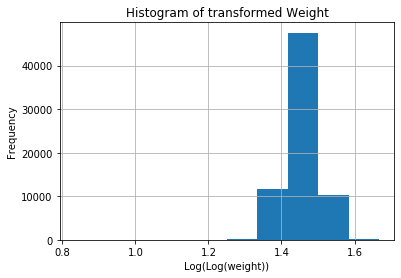

In [24]:
df.weight_log.hist() 
plt.xlabel('Log(Log(weight))')
plt.ylabel('Frequency')
plt.title('Histogram of transformed Weight')

Since, the transfomed variable weight has bell shape we need to see if there some outliers after this transformation.
We will drow boxplot of transfomed variable weight.

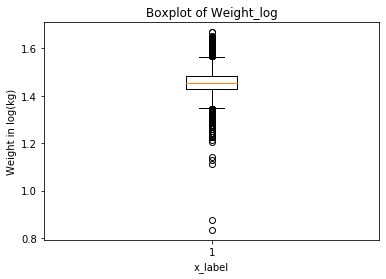

In [25]:
boxplot_figure(data = df.weight_log,title = 'Boxplot of Weight_log',x_label = 'x_label' ,y_label = 'Weight in log(kg)')

From previous boxplot we can see that there are outliers and we need how much are there.

In [26]:
q_1 = df.weight_log.quantile(q = 0.25)
q_3 = df.weight_log.quantile(q = 0.75)
bound_weight_log = bound_lower_upper(q_1, q_3)
#Number of outliers
df_weight_log_outlier = df[(df['weight_log'] < bound_weight_log[0]) | (df['weight_log'] > bound_weight_log[1])]
df_weight_log_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log
23,23376.0,2,156.0,45.0,110,60,1,1,0,0,1,0,1.336753
338,21078.0,1,157.0,142.0,120,80,1,1,0,0,1,1,1.600564
360,19803.0,1,144.0,44.0,130,80,1,1,0,0,1,0,1.330832
383,19517.0,1,147.0,41.0,80,50,1,1,0,0,1,0,1.311994
389,16718.0,2,165.0,169.0,120,80,1,1,0,0,1,0,1.635086
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69797,17575.0,1,164.0,45.0,115,70,1,1,0,0,1,0,1.336753
69851,14683.0,1,150.0,42.0,90,60,1,1,0,0,1,0,1.318462
69908,14823.0,1,152.0,42.0,120,80,1,1,0,0,1,0,1.318462
69919,17312.0,1,159.0,45.0,110,70,2,2,0,0,1,0,1.336753


We will handle with this 1127 outlier values cupping them to the bounds values of boxplot for weight_log. Also we will drow the boxplot of weight_log without outliers.

In [27]:
for number in df_weight_log_outlier['weight_log']:
    if number < bound_weight_log[0]:
        df['weight_log'].replace(number, bound_weight_log[0], inplace = True)
    else:
        df['weight_log'].replace(number, bound_weight_log[1], inplace = True)

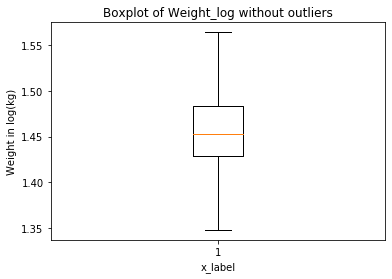

In [28]:
boxplot_figure(data = df.weight_log,title = 'Boxplot of Weight_log without outliers',x_label = 'x_label' ,y_label = 'Weight in log(kg)')

### Ap_hi - Systolic blood pressure

Next continuous variable is Systolic blood pressure. We will drow the histogram to see the distribution of it. 

Text(0.5, 1.0, 'Histogram of Ap_hi')

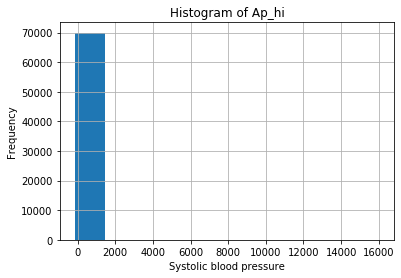

In [29]:
df.ap_hi.hist()
plt.xlabel('Systolic blood pressure')
plt.ylabel('Frequency')
plt.title('Histogram of Ap_hi')

From previous histogram we can't see the distribution of this variable because there are very large outliers and they spoil the distribution picture. 
So, we will drow the boxplot of Ap_hi.

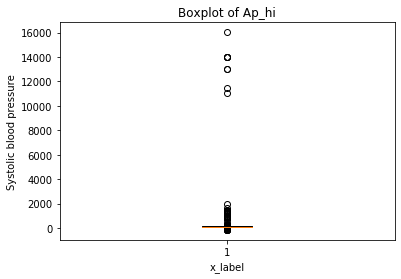

In [30]:
boxplot_figure(data = df.ap_hi,title = 'Boxplot of Ap_hi',x_label = 'x_label' ,y_label = 'Systolic blood pressure')

We will try to handle with this outliers transforming variable and then to observe such obtained variable. 
We will use logarithm function for transformation. 
We will drow the histogram and boxplot of transformed variable.


In [31]:
df['ap_hi_log'] = np.log(df.ap_hi)
df.head()

C:\Users\korisnik\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log
0,18393.0,2,168.0,62.0,110,80,1,1,0,0,1,0,1.417583,4.700480
1,20228.0,1,156.0,85.0,140,90,3,1,0,0,1,1,1.491251,4.941642
2,18857.0,1,165.0,64.0,130,70,3,1,0,0,0,1,1.425247,4.867534
3,17623.0,2,169.0,82.0,150,100,1,1,0,0,1,1,1.483130,5.010635
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612,4.605170


Text(0.5, 1.0, 'Histogram of Ap_hi_log')

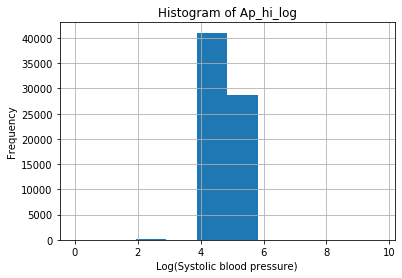

In [32]:
df.ap_hi_log.hist()
plt.xlabel('Log(Systolic blood pressure)')
plt.ylabel('Frequency')
plt.title('Histogram of Ap_hi_log')

We will calculate how much outliers we have in this transformed variable and them we will compare with number of outliers without transformation. Then we will deside which variable we will use for prediction.

In [33]:
q_1_hi = df.ap_hi_log.quantile(q = 0.25)
q_3_hi = df.ap_hi_log.quantile(q = 0.75)
bound_ap_hi_log = bound_lower_upper(q_1_hi, q_3_hi)
#Number of outliers
df_ap_hi_log_outlier = df[(df['ap_hi_log'] < bound_ap_hi_log[0]) | (df['ap_hi_log'] > bound_ap_hi_log[1])]
df_ap_hi_log_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log
56,17407.0,1,171.0,76.0,90,60,1,2,0,0,1,0,1.465737,4.499810
59,20431.0,1,164.0,64.0,180,90,1,1,1,0,1,1,1.425247,5.192957
61,20960.0,2,165.0,75.0,180,90,3,1,0,0,1,1,1.462674,5.192957
101,18718.0,1,167.0,80.0,190,90,2,1,0,1,0,0,1.477511,5.247024
188,22527.0,1,165.0,67.0,90,60,1,1,0,0,1,0,1.436201,4.499810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69894,16857.0,1,160.0,70.0,200,100,1,2,0,0,1,1,1.446565,5.298317
69912,16002.0,1,155.0,48.0,90,70,1,1,0,0,1,0,1.353565,4.499810
69937,14489.0,1,160.0,53.0,90,60,1,1,0,0,1,0,1.378840,4.499810
69978,18800.0,1,163.0,78.0,90,60,1,1,0,0,1,1,1.471717,4.499810


In [34]:
#We will handle with this outlier values cupping them to the bounds values
for number in df_ap_hi_log_outlier['ap_hi_log']:
    if number < bound_ap_hi_log[0]:
        df['ap_hi_log'].replace(number, bound_ap_hi_log[0], inplace = True)
    else:
        df['ap_hi_log'].replace(number, bound_ap_hi_log[1], inplace = True)

Just first we need to look at correlation matrix and we can see that corrleation between corrected variables and target variable is higher. 
So, it means that relationship between them is growing. 

In [35]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log
age,1.000000,-0.022771,-0.086512,0.053688,0.020764,0.017645,0.154431,0.098702,-0.047664,-0.029745,-0.009904,0.238182,0.062092,0.213818
gender,-0.022771,1.000000,0.521919,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037,0.168487,0.064343
height,-0.086512,0.521919,1.000000,0.305810,0.005391,0.005879,-0.054584,-0.020682,0.196199,0.097959,-0.008228,-0.012382,0.331321,0.020202
weight,0.053688,0.155320,0.305810,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599,0.977361,0.273631
ap_hi,0.020764,0.005996,0.005391,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475,0.031588,0.150180
ap_lo,0.017645,0.015241,0.005879,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717,0.042276,0.148194
cholesterol,0.154431,-0.035915,-0.054584,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119,0.138493,0.197433
gluc,0.098702,-0.020558,-0.020682,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268,0.102956,0.093413
smoke,-0.047664,0.338131,0.196199,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533,0.068840,0.027225
alco,-0.029745,0.170950,0.097959,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366,0.067717,0.031995


Now we need to calculate the number of outliers of variable ap_hi before transormation. 

In [36]:
bound_ap_hi = bound_lower_upper(summary['ap_hi'][4],summary['ap_hi'][6])
#Number of outliers
df_ap_hi_outlier = df[(df['ap_hi'] < bound_ap_hi[0]) | (df['ap_hi'] > bound_ap_hi[1])]
df_ap_hi_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log
59,20431.0,1,164.0,64.0,180,90,1,1,1,0,1,1,1.425247,5.172868
61,20960.0,2,165.0,75.0,180,90,3,1,0,0,1,1,1.462674,5.172868
101,18718.0,1,167.0,80.0,190,90,2,1,0,1,0,0,1.477511,5.172868
209,18169.0,2,172.0,62.0,80,70,1,1,0,0,1,0,1.417583,4.556266
230,23376.0,2,175.0,75.0,180,100,3,1,1,1,1,1,1.462674,5.172868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69587,23223.0,1,169.0,101.0,180,110,1,1,0,0,0,1,1.529338,5.172868
69593,16781.0,2,179.0,93.0,180,100,1,2,0,1,1,1,1.511296,5.172868
69830,22552.0,2,163.0,67.0,180,100,2,1,0,0,0,1,1.436201,5.172868
69894,16857.0,1,160.0,70.0,200,100,1,2,0,0,1,1,1.446565,5.172868


In [37]:
#We need to compare results of correlation without transformation variable ap_hi with logarithm function
df['ap_hi_2'] = df.ap_hi
#We will handle with this outlier values cupping them to the bounds values
for number in df_ap_hi_outlier['ap_hi']:
    if number < bound_ap_hi[0]:
        df['ap_hi_2'].replace(number, bound_ap_hi[0], inplace = True)
    else:
        df['ap_hi_2'].replace(number, bound_ap_hi[1], inplace = True)

In [38]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2
age,1.000000,-0.022771,-0.086512,0.053688,0.020764,0.017645,0.154431,0.098702,-0.047664,-0.029745,-0.009904,0.238182,0.062092,0.213818,0.209299
gender,-0.022771,1.000000,0.521919,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037,0.168487,0.064343,0.061674
height,-0.086512,0.521919,1.000000,0.305810,0.005391,0.005879,-0.054584,-0.020682,0.196199,0.097959,-0.008228,-0.012382,0.331321,0.020202,0.016544
weight,0.053688,0.155320,0.305810,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599,0.977361,0.273631,0.271448
ap_hi,0.020764,0.005996,0.005391,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475,0.031588,0.150180,0.150179
ap_lo,0.017645,0.015241,0.005879,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717,0.042276,0.148194,0.150893
cholesterol,0.154431,-0.035915,-0.054584,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119,0.138493,0.197433,0.197327
gluc,0.098702,-0.020558,-0.020682,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268,0.102956,0.093413,0.092647
smoke,-0.047664,0.338131,0.196199,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533,0.068840,0.027225,0.027236
alco,-0.029745,0.170950,0.097959,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366,0.067717,0.031995,0.032440


As we can see the number of outliers is lower before transformation and also correlation of ths two variables with targer variable is almost equal.
So, we will use ap_hi_2 which is the same as ap_hi but without outliers.

### Ap_lo - diastolic blood pressure

Next continuous variable which we need to examine is diastolic blood pressure.
FIrst we will drow the histogram and boxplot.

Text(0.5, 1.0, 'Histogram of Ap_lo')

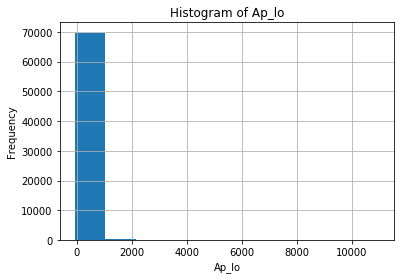

In [39]:
df.ap_lo.hist()
plt.xlabel('Ap_lo')
plt.ylabel('Frequency')
plt.title('Histogram of Ap_lo')

Similarly as in variable systolic blood pressure we can't see the distribution, because there are large outliers which are far away from rest group of data. So, we need to look at boxplot.

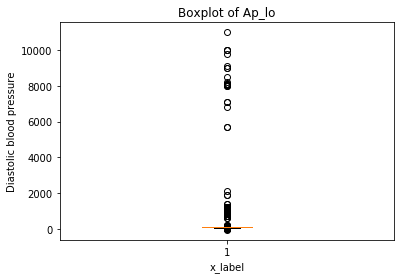

In [40]:
boxplot_figure(data = df.ap_lo,title = 'Boxplot of Ap_lo',x_label = 'x_label', y_label = 'Diastolic blood pressure')

Also, we will try first to transform this variable using logarithm function for transformation. We will calculate how much outliers we have after and before this transformation and then we will deside which one is better to use. 

In [41]:
df['ap_lo_log'] = np.log(df.ap_lo)
df.head()

C:\Users\korisnik\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\korisnik\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log
0,18393.0,2,168.0,62.0,110,80,1,1,0,0,1,0,1.417583,4.700480,110,4.382027
1,20228.0,1,156.0,85.0,140,90,3,1,0,0,1,1,1.491251,4.941642,140,4.499810
2,18857.0,1,165.0,64.0,130,70,3,1,0,0,0,1,1.425247,4.867534,130,4.248495
3,17623.0,2,169.0,82.0,150,100,1,1,0,0,1,1,1.483130,5.010635,150,4.605170
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612,4.605170,100,4.094345


Now we will calculate the number of outliers for transformed variable diastolic blood pressure. 
We will handle with this outlier values cupping them to the bounds values.

In [42]:
q_1_lo = df.ap_lo_log.quantile(q = 0.25)
q_3_lo = df.ap_lo_log.quantile(q = 0.75)
bound_ap_lo_log = bound_lower_upper(q_1_lo, q_3_lo)
#Number of outliers
df_ap_lo_log_outlier = df[(df['ap_lo_log'] < bound_ap_lo_log[0]) | (df['ap_lo_log'] > bound_ap_lo_log[1])]
df_ap_lo_log_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612,4.605170,100,4.094345
9,19834.0,1,164.0,68.0,110,60,1,1,0,0,0,0,1.439718,4.700480,110,4.094345
23,23376.0,2,156.0,45.0,110,60,1,1,0,0,1,0,1.347723,4.700480,110,4.094345
43,20556.0,2,159.0,63.0,120,60,1,1,0,0,1,1,1.421453,4.787492,120,4.094345
50,18238.0,1,160.0,75.0,100,60,1,1,0,0,0,0,1.462674,4.605170,100,4.094345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69929,19834.0,1,164.0,85.0,165,110,3,3,0,0,1,1,1.491251,5.105945,165,4.700480
69932,15243.0,2,171.0,67.0,110,60,1,1,0,0,1,0,1.436201,4.700480,110,4.094345
69937,14489.0,1,160.0,53.0,90,60,1,1,0,0,1,0,1.378840,4.556266,90,4.094345
69967,21416.0,2,168.0,63.0,140,1000,1,1,0,0,1,1,1.421453,4.941642,140,6.907755


In [43]:
#We will handle with this outlier values cupping them to the bounds values
for number in df_ap_lo_log_outlier['ap_lo_log']:
    if number < bound_ap_lo_log[0]:
        df['ap_hi_log'].replace(number, bound_ap_lo_log[0], inplace = True)
    else:
        df['ap_lo_log'].replace(number, bound_ap_lo_log[1], inplace = True)

Once again we will look at correlation matrix. We need to check this to see if this transformation was good or not. 
If correlation with target variable didn't change we can drop this transformation.

In [44]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log
age,1.000000,-0.022771,-0.086512,0.053688,0.020764,0.017645,0.154431,0.098702,-0.047664,-0.029745,-0.009904,0.238182,0.062092,0.213818,0.209299,0.151156
gender,-0.022771,1.000000,0.521919,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037,0.168487,0.064343,0.061674,0.067878
height,-0.086512,0.521919,1.000000,0.305810,0.005391,0.005879,-0.054584,-0.020682,0.196199,0.097959,-0.008228,-0.012382,0.331321,0.020202,0.016544,0.039996
weight,0.053688,0.155320,0.305810,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599,0.977361,0.273631,0.271448,0.240473
ap_hi,0.020764,0.005996,0.005391,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475,0.031588,0.150180,0.150179,0.076204
ap_lo,0.017645,0.015241,0.005879,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717,0.042276,0.148194,0.150893,0.228451
cholesterol,0.154431,-0.035915,-0.054584,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119,0.138493,0.197433,0.197327,0.147862
gluc,0.098702,-0.020558,-0.020682,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268,0.102956,0.093413,0.092647,0.070686
smoke,-0.047664,0.338131,0.196199,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533,0.068840,0.027225,0.027236,0.025756
alco,-0.029745,0.170950,0.097959,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366,0.067717,0.031995,0.032440,0.036455


In next code blok we will calculate number of outliers without transformation and we will drop this outliers on two ways to see which one is better.

In [45]:
bound_ap_lo = bound_lower_upper(summary['ap_lo'][4],summary['ap_lo'][6])
#Number of outliers
df_ap_lo_outlier = df[(df['ap_lo'] < bound_ap_lo[0]) | (df['ap_lo'] > bound_ap_lo[1])]
df_ap_lo_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612,4.605170,100,4.094345
9,19834.0,1,164.0,68.0,110,60,1,1,0,0,0,0,1.439718,4.700480,110,4.094345
23,23376.0,2,156.0,45.0,110,60,1,1,0,0,1,0,1.347723,4.700480,110,4.094345
43,20556.0,2,159.0,63.0,120,60,1,1,0,0,1,1,1.421453,4.787492,120,4.094345
50,18238.0,1,160.0,75.0,100,60,1,1,0,0,0,0,1.462674,4.605170,100,4.094345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69929,19834.0,1,164.0,85.0,165,110,3,3,0,0,1,1,1.491251,5.105945,165,4.676484
69932,15243.0,2,171.0,67.0,110,60,1,1,0,0,1,0,1.436201,4.700480,110,4.094345
69937,14489.0,1,160.0,53.0,90,60,1,1,0,0,1,0,1.378840,4.556266,90,4.094345
69967,21416.0,2,168.0,63.0,140,1000,1,1,0,0,1,1,1.421453,4.941642,140,4.676484


As we can see we have less outliers without transformation and then we will drop the transformed ap_lo_log. 
First way to handle with this outlier values cupping them to the bounds values.

In [46]:
#We need to compare results of correlation without transformation variable ap_lo with logarithm function
df['ap_lo_2'] = df.ap_lo
#We will handle with this outlier values cupping them to the bounds values
for number in df_ap_lo_outlier['ap_lo']:
    if number < bound_ap_lo[0]:
        df['ap_lo_2'].replace(number, bound_ap_lo[0], inplace = True)
    else:
        df['ap_lo_2'].replace(number, bound_ap_lo[1], inplace = True)

In [47]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log,ap_lo_2
0,18393.0,2,168.0,62.0,110,80,1,1,0,0,1,0,1.417583,4.700480,110,4.382027,80
1,20228.0,1,156.0,85.0,140,90,3,1,0,0,1,1,1.491251,4.941642,140,4.499810,90
2,18857.0,1,165.0,64.0,130,70,3,1,0,0,0,1,1.425247,4.867534,130,4.248495,70
3,17623.0,2,169.0,82.0,150,100,1,1,0,0,1,1,1.483130,5.010635,150,4.605170,100
4,17474.0,1,156.0,56.0,100,60,1,1,0,0,0,0,1.392612,4.605170,100,4.094345,65


One more correction method for outliers:
Replace values less then lower bound with q_1 and replace values grater then upper bound with q_3.

In [48]:
df['ap_lo_3'] = df['ap_lo']
#We will handle with this outlier values cupping them to the quartiles values
for number in df_ap_lo_outlier['ap_lo']:
    if number < bound_ap_lo[0]:
        df['ap_lo_3'].replace(number, summary['ap_lo'][4], inplace = True)
    else:
        df['ap_lo_3'].replace(number, summary['ap_lo'][6], inplace = True)

Once again we will look at correlation matrix. We need to check which variables are important for prediction model.

In [49]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_log,ap_hi_log,ap_hi_2,ap_lo_log,ap_lo_2,ap_lo_3
age,1.000000,-0.022771,-0.086512,0.053688,0.020764,0.017645,0.154431,0.098702,-0.047664,-0.029745,-0.009904,0.238182,0.062092,0.213818,0.209299,0.151156,0.155773,0.147079
gender,-0.022771,1.000000,0.521919,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037,0.168487,0.064343,0.061674,0.067878,0.067047,0.054216
height,-0.086512,0.521919,1.000000,0.305810,0.005391,0.005879,-0.054584,-0.020682,0.196199,0.097959,-0.008228,-0.012382,0.331321,0.020202,0.016544,0.039996,0.030475,0.014932
weight,0.053688,0.155320,0.305810,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599,0.977361,0.273631,0.271448,0.240473,0.255497,0.231683
ap_hi,0.020764,0.005996,0.005391,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475,0.031588,0.150180,0.150179,0.076204,0.081393,0.076176
ap_lo,0.017645,0.015241,0.005879,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717,0.042276,0.148194,0.150893,0.228451,0.256210,0.127117
cholesterol,0.154431,-0.035915,-0.054584,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119,0.138493,0.197433,0.197327,0.147862,0.165979,0.164935
gluc,0.098702,-0.020558,-0.020682,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268,0.102956,0.093413,0.092647,0.070686,0.075741,0.072572
smoke,-0.047664,0.338131,0.196199,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533,0.068840,0.027225,0.027236,0.025756,0.026962,0.024381
alco,-0.029745,0.170950,0.097959,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366,0.067717,0.031995,0.032440,0.036455,0.040681,0.037469


Now we can observe this correlation matrix. The most important variables are age, weight, ap_hi, ap_lo, cholesterol. 
But we will examine model with and without some of the less important variables and find the best prediction model. 

One more way to see the feature importance for prediction Extra Tree Classifier for extracting the top features for the dataset.
We will define version 2 of our database and exclude redundant variables.

In [50]:
df_v2 = df.drop(['weight', 'ap_hi', 'ap_hi_log', 'ap_lo', 'ap_lo_log', 'ap_lo_3', 'cardio'], axis = 1)


We will mark as X_t independent variables and with y_t target variable. This is important to because of the structure of this method. 

In [51]:
X_t = df_v2.iloc[:,:]  #independent variables
y_t = df.iloc[:,11:12]    #target column

Now we will create the model for extraction the most important features and then we will drow the graph of feaute importance.

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_t,y_t)

C:\Users\korisnik\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [53]:
print(model.feature_importances_)

[0.2924961  0.01147111 0.1757246  0.03904652 0.0145644  0.00651923
 0.0061985  0.00852532 0.1816114  0.17072938 0.09311344]


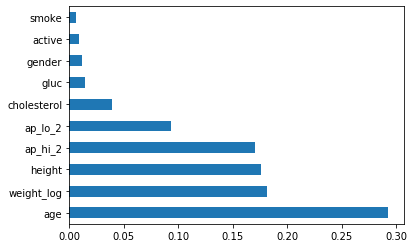

In [54]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_t.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From previous graph we can see that we have a little different importance than in correlation matrix.  
The most important variables are age, weight_log, height, ap_hi, ap_lo and cholesterol.
Ap_hi_2 and ap_lo_2 are variables without outliers. 

# Data modeling

First we will try with to include all variables in model.
Then we will exclude less important variabes and check the accuracy and see behaviour of our model.

In [55]:
df_v2.head()

,age,gender,height,cholesterol,gluc,smoke,alco,active,weight_log,ap_hi_2,ap_lo_2
0,18393.0,2,168.0,1,1,0,0,1,1.417583,110,80
1,20228.0,1,156.0,3,1,0,0,1,1.491251,140,90
2,18857.0,1,165.0,3,1,0,0,0,1.425247,130,70
3,17623.0,2,169.0,1,1,0,0,1,1.483130,150,100
4,17474.0,1,156.0,1,1,0,0,0,1.392612,100,65


Changing pandas dataframe to numpy array and preparing data for modeling.

In [56]:
X = df_v2.iloc[:,lambda df: [0, 1, 2, 3, 4, 8, 9, 10]].values
y = df.iloc[:,11:12].values

Since we have different domain of variables, we need to unify it and we will do that normalazing data. 

In [57]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

If we have more than two categories in target variable we need to change values of target variable in binary.
In our case it isn't necessary because we have just 0 and 1.

In [58]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

We need to split dataset on train data and test data. For test data we will use 0.25 data from our dataset.

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [60]:
y_test.shape

(17494, 2)

### Random Forest Classifier, Logistic regression, SVC  with implemented CV

We will import models from sklearn.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [62]:
#The models are defined bellow
rf_class = RandomForestClassifier(n_estimators=10)
log_class = LogisticRegression()
svm_class = svm.SVC()

##### Random Forest Classifier:

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [63]:
#Results for Random Forest
print(cross_val_score(rf_class, X, y, scoring='accuracy', cv = 10))
accuracy = cross_val_score(rf_class, X, y, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)

[0.65247213 0.65075736 0.66147471 0.65904544 0.64246928 0.65918834
 0.65256539 0.65256539 0.63913106 0.65399457]
Accuracy of Random Forests is:  65.21520226097796


 
 
    
In order to use models Logistic regression and SVM we need to change the shape of output data. 

In [64]:
X_data = df_v2.iloc[:,lambda df: [0, 1, 2, 3, 4, 8, 9, 10]] # Input data without standardizing  procedure
y_target = df.iloc[:,11:12].values.ravel()

##### Logistic regression: 

Tthe logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

In [65]:
#Result for Logistic regression model before standardizing data
print(cross_val_score(log_class, X_data, y_target, scoring='accuracy', cv = 10))
accuracy = cross_val_score(log_class, X_data, y_target, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Logistic Regression is: " , accuracy)

[0.69348385 0.69119748 0.70148614 0.69262646 0.69905687 0.70005716
 0.69501215 0.70101472 0.68357868 0.68872374]
Accuracy of Logistic Regression is:  69.46237257685621


In [176]:
#Result for Logistic regression model after standardizing data
print(cross_val_score(log_class, X, y_target, scoring='accuracy', cv = 10))
accuracy = cross_val_score(log_class, X, y_target, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Logistic Regression is: " , accuracy)

[0.72420692 0.7250643  0.7323521  0.73006573 0.72334953 0.72906545
 0.72373875 0.73017007 0.72488209 0.72373875]
Accuracy of Logistic Regression is:  72.6663368528945


##### Support Vector Machine (SVC)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
The advantages of support vector machines are:

-Effective in high dimensional spaces.

-Still effective in cases where number of dimensions is greater than the number of samples.

-Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

In [175]:
# Result for SVM model with standardized input data X
print(cross_val_score(svm_class, X, y_target, scoring='accuracy', cv = 10))
accuracy = cross_val_score(svm_class, X, y_target, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)

[0.73320949 0.73435267 0.74178337 0.74206916 0.72620749 0.73506716
 0.72688295 0.73803058 0.72931256 0.73288552]
Accuracy of SVM is:  73.39800959076774


### Neural network from sklearn models

First we will try the Multi-layer Perceptron classifier. This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

 We import MLPClassifier and define the function for creating the model for prediction with parameters from dictionary with keys activation and solver. 
We will combine different values to obtain the best model.
We will print the dictionary with acc for each combination and see which of this is the best. This is just, a few combination in theory we can have much more then this.

In [67]:
from sklearn.neural_network import MLPClassifier #Multi-layer Perceptron classifier
from sklearn.metrics import accuracy_score
param_mlp = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            }
#We will define function for getting model of Multi-layer Perceptron classifier
def model_mlp(activation = 'identity', solver = 'adam'):
    clf = MLPClassifier(solver = solver, activation = activation, alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
    return clf
results_mlp = {'identity':{'adam': 0.0, 'sgd': 0.0},
             'logistic':{'adam': 0.0, 'sgd': 0.0},
             'tanh':{'adam': 0.0, 'sgd': 0.0},
             'relu':{'adam': 0.0, 'sgd': 0.0},
            }
for act in param_mlp['activation']:
    for solver in param_mlp['solver']:    
        clf = model_mlp(solver = solver, activation = act)
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        acc = accuracy_score(y_test,y_predict)*100
        for key in results_mlp:
            if key == act:
                for solver_r in results_mlp[key]:
                    if solver_r == solver:
                        results_mlp[key][solver_r] = acc
                    
print(results_mlp)


C:\Users\korisnik\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'identity': {'adam': 72.69349491254144, 'sgd': 72.7277923859609}, 'logistic': {'adam': 73.02503715559621, 'sgd': 72.88213101634847}, 'tanh': {'adam': 73.00217217331657, 'sgd': 72.86498227963874}, 'relu': {'adam': 73.32799817080142, 'sgd': 73.16222704927404}}


### Neural network from keras 

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks.

It wraps the efficient numerical computation librariy TensorFlow and allows you to define and train neural network models in just a few lines of code. TensorFlow is the premier open-source deep learning framework developed and maintained by Google. 

A neural network is a network or circuit of neurons, or in a modern sense, an artificial neural network, composed of artificial neurons or nodes. 

A neuron  is an electrically excitable cell that communicates with other cells via specialized connections called synapses.

Activation function controls the amplitude of the output. The amplitude of a periodic variable is a measure of its change over a single period. 

Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.

In [68]:
# Neural network
model = Sequential()
model.add(Dense(8, input_dim=8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [69]:
#Now we need to specify the loss function and the optimizer. 
#It is done using compile function in keras.
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [70]:
#Training model
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Train on 52482 samples
Epoch 1/100
52482/52482 [==============================] - 4s 76us/sample - loss: 0.6908 - accuracy: 0.5845
Epoch 2/100
52482/52482 [==============================] - 2s 31us/sample - loss: 0.6826 - accuracy: 0.6631
Epoch 3/100
52482/52482 [==============================] - 2s 30us/sample - loss: 0.6741 - accuracy: 0.6854
Epoch 4/100
52482/52482 [==============================] - 2s 35us/sample - loss: 0.6608 - accuracy: 0.6987
Epoch 5/100
52482/52482 [==============================] - 2s 35us/sample - loss: 0.6409 - accuracy: 0.7081
Epoch 6/100
52482/52482 [==============================] - 2s 30us/sample - loss: 0.6157 - accuracy: 0.7136
Epoch 7/100
52482/52482 [==============================] - 2s 30us/sample - loss: 0.5920 - accuracy: 0.7173
Epoch 8/100
52482/52482 [==============================] - 2s 30us/sample - loss: 0.5753 - accuracy: 0.7198
Epoch 9/100
52482/52482 [==============================] - 2s 29us/sample - loss: 0.5661 - accuracy: 0.7211
Epoch

Since we train our neural network now we need to find the accuracy of this model. For that we need to predict the target values using X_test and compare with values in y_test.

In [71]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [72]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 72.73350863153081


Now we will try to find the best model tuning parameters and using grid search CV.

In [73]:
#We need to define the list of optimizers and activations
param_grid_optimizer = {'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']}
param_grid_activation = {'activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']}
param_grid_batch_epohs = {'batch_epohs':[10, 20, 40, 60, 80, 100],
                          'epohs': [10, 50, 100],
                         } 
#list_neurons = [1, 5, 10, 15, 20, 25, 30] 
param_grid_drop_rate = {'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

#### Tuning parameters

It is possible and recommended to search the hyper-parameter space for the best cross validation score. We will tune the parameters using GridSearchCV. GridSearchCV exhaustively considers all parameter combinations.

First we will tune the parameter of activation as follows:

In [74]:
from tensorflow.keras.layers import Dropout
def create_model(optimizer='adam', activation = 'relu', neurons = 1, dropout_rate=0.0):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [75]:
# def create_model_2(optimizer='adam', activation = 'relu', neurons = 1, dropout_rate=0.0):
#     # create model
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=8, activation=activation))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, activation='softmax'))
#     # Compile model
#     model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

In [76]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid_activation, n_jobs=-1, cv=3)


In [77]:
grid_result = grid.fit(X, y)
params = grid_result.cv_results_['params']
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']

In [78]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.733852 (0.001429) with: {'activation': 'softmax'}
0.734366 (0.001131) with: {'activation': 'softplus'}
0.732365 (0.000244) with: {'activation': 'softsign'}
0.733394 (0.001925) with: {'activation': 'relu'}
0.733766 (0.001283) with: {'activation': 'tanh'}
0.732951 (0.001030) with: {'activation': 'sigmoid'}
0.732465 (0.000793) with: {'activation': 'hard_sigmoid'}
0.726878 (0.000718) with: {'activation': 'linear'}


Let tune the parameter for optimization as follows:

In [79]:
grid_opt = GridSearchCV(estimator=model, param_grid=param_grid_optimizer, n_jobs=-1, cv=3)
grid_result_opt = grid_opt.fit(X, y)
params_opt = grid_result_opt.cv_results_['params']
means_opt = grid_result_opt.cv_results_['mean_test_score']
stds_opt = grid_result_opt.cv_results_['std_test_score']

In [80]:
for mean, stdev, param in zip(means_opt, stds_opt, params_opt):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.731208 (0.001214) with: {'optimizer': 'SGD'}
0.733223 (0.001778) with: {'optimizer': 'RMSprop'}
0.718046 (0.003585) with: {'optimizer': 'Adagrad'}
0.637962 (0.016022) with: {'optimizer': 'Adadelta'}
0.732508 (0.001682) with: {'optimizer': 'Adam'}
0.732008 (0.001386) with: {'optimizer': 'Adamax'}
0.734495 (0.000300) with: {'optimizer': 'Nadam'}


Let tune the parameter for dropout rate as follows:

In [81]:
grid_drop = GridSearchCV(estimator=model, param_grid=param_grid_drop_rate, n_jobs=-1, cv=3)
grid_result_drop = grid_drop.fit(X, y)
params_drop = grid_result_drop.cv_results_['params']
means_drop = grid_result_drop.cv_results_['mean_test_score']
stds_drop = grid_result_drop.cv_results_['std_test_score']

In [82]:
for mean, stdev, param in zip(means_drop, stds_drop, params_drop):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.733694 (0.000535) with: {'dropout_rate': 0.0}
0.732866 (0.000917) with: {'dropout_rate': 0.1}
0.730708 (0.002227) with: {'dropout_rate': 0.2}
0.729436 (0.001196) with: {'dropout_rate': 0.3}
0.728636 (0.001986) with: {'dropout_rate': 0.4}
0.725291 (0.003117) with: {'dropout_rate': 0.5}
0.725863 (0.003048) with: {'dropout_rate': 0.6}
0.722433 (0.003569) with: {'dropout_rate': 0.7}
0.723477 (0.002004) with: {'dropout_rate': 0.8}
0.680904 (0.032801) with: {'dropout_rate': 0.9}


In [83]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size = 0.25)

Now we will define functions for model training and testing with neural networks. And than we will train some models with different parameters. 

In [84]:
#Function for creating model
def model_train(optimizer='adam', activation = 'relu'):
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=8, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(2, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#Function for testing model
def model_test(model):
    y_pred = model.predict(X_test)
    #Converting predictions to label
    pred = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i]))
    #Converting one hot encoded test label to label
    test = list()
    for i in range(len(y_test)):
        test.append(np.argmax(y_test[i]))
    a = accuracy_score(pred,test)
    print('Accuracy is:', a*100)
    return a*100

Now we will compile the first model_1 with neural networks. And fit model based on the train data.

In [85]:
#Model compile
model_1 = model_train(optimizer='adam', activation = 'relu')
#Model fit
history_v1 = model_1.fit(X_train, y_train, epochs=100, batch_size=64)

Train on 52482 samples
Epoch 1/100
52482/52482 [==============================] - 5s 87us/sample - loss: 0.5880 - accuracy: 0.6999
Epoch 2/100
52482/52482 [==============================] - 2s 35us/sample - loss: 0.5512 - accuracy: 0.7294
Epoch 3/100
52482/52482 [==============================] - 2s 37us/sample - loss: 0.5485 - accuracy: 0.7315
Epoch 4/100
52482/52482 [==============================] - 2s 34us/sample - loss: 0.5469 - accuracy: 0.7325
Epoch 5/100
52482/52482 [==============================] - 2s 35us/sample - loss: 0.5460 - accuracy: 0.7328
Epoch 6/100
52482/52482 [==============================] - 1s 28us/sample - loss: 0.5454 - accuracy: 0.7328
Epoch 7/100
52482/52482 [==============================] - 2s 29us/sample - loss: 0.5446 - accuracy: 0.7335
Epoch 8/100
52482/52482 [==============================] - 2s 30us/sample - loss: 0.5444 - accuracy: 0.7329
Epoch 9/100
52482/52482 [==============================] - 2s 32us/sample - loss: 0.5439 - accuracy: 0.7344
Epoch

52482/52482 [==============================] - 2s 31us/sample - loss: 0.5383 - accuracy: 0.7383
Epoch 77/100
52482/52482 [==============================] - 2s 31us/sample - loss: 0.5382 - accuracy: 0.7378
Epoch 78/100
52482/52482 [==============================] - 2s 31us/sample - loss: 0.5383 - accuracy: 0.7377
Epoch 79/100
52482/52482 [==============================] - 2s 31us/sample - loss: 0.5382 - accuracy: 0.7374
Epoch 80/100
52482/52482 [==============================] - 2s 31us/sample - loss: 0.5381 - accuracy: 0.7380
Epoch 81/100
52482/52482 [==============================] - 2s 31us/sample - loss: 0.5381 - accuracy: 0.7382
Epoch 82/100
52482/52482 [==============================] - 2s 31us/sample - loss: 0.5382 - accuracy: 0.7371
Epoch 83/100
52482/52482 [==============================] - 2s 31us/sample - loss: 0.5380 - accuracy: 0.7376
Epoch 84/100
52482/52482 [==============================] - 2s 31us/sample - loss: 0.5382 - accuracy: 0.7382
Epoch 85/100
52482/52482 [======

In [86]:
history_v1_2 = model_1.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 52482 samples, validate on 17494 samples
Epoch 1/100
52482/52482 [==============================] - 10s 197us/sample - loss: 0.5379 - accuracy: 0.7387 - val_loss: 0.5452 - val_accuracy: 0.7333
Epoch 2/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5379 - accuracy: 0.7375 - val_loss: 0.5451 - val_accuracy: 0.7343
Epoch 3/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5380 - accuracy: 0.7383 - val_loss: 0.5452 - val_accuracy: 0.7357
Epoch 4/100
52482/52482 [==============================] - 2s 44us/sample - loss: 0.5377 - accuracy: 0.7371 - val_loss: 0.5458 - val_accuracy: 0.7328
Epoch 5/100
52482/52482 [==============================] - 2s 45us/sample - loss: 0.5379 - accuracy: 0.7383 - val_loss: 0.5455 - val_accuracy: 0.7354
Epoch 6/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5378 - accuracy: 0.7371 - val_loss: 0.5452 - val_accuracy: 0.7335
Epoch 7/100
52482/52482 [=======================

Epoch 55/100
52482/52482 [==============================] - 2s 38us/sample - loss: 0.5373 - accuracy: 0.7385 - val_loss: 0.5459 - val_accuracy: 0.7322
Epoch 56/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5373 - accuracy: 0.7384 - val_loss: 0.5462 - val_accuracy: 0.7335
Epoch 57/100
52482/52482 [==============================] - 2s 38us/sample - loss: 0.5372 - accuracy: 0.7385 - val_loss: 0.5450 - val_accuracy: 0.7338
Epoch 58/100
52482/52482 [==============================] - 2s 38us/sample - loss: 0.5374 - accuracy: 0.7383 - val_loss: 0.5449 - val_accuracy: 0.7341
Epoch 59/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5374 - accuracy: 0.7383 - val_loss: 0.5454 - val_accuracy: 0.7342
Epoch 60/100
52482/52482 [==============================] - 2s 42us/sample - loss: 0.5373 - accuracy: 0.7377 - val_loss: 0.5458 - val_accuracy: 0.7345
Epoch 61/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5374 - ac

The accuracy of model_1 and the graph of accuracy of test and train is given bellow:

Accuracy is: 73.42517434548988


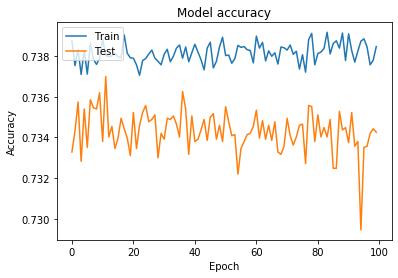

In [87]:
acc_1 = model_test(model_1)
plt.plot(history_v1_2.history['accuracy'])
plt.plot(history_v1_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Now we will compile the second model_2 with neural networks. And fit model based on the train data.

In [88]:
#Model compile
model_2 = model_train(optimizer='adam', activation = 'softplus')
#Model fit
history_2 = model_2.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 52482 samples, validate on 17494 samples
Epoch 1/100
52482/52482 [==============================] - 3s 62us/sample - loss: 0.5715 - accuracy: 0.7143 - val_loss: 0.5619 - val_accuracy: 0.7230
Epoch 2/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5564 - accuracy: 0.7268 - val_loss: 0.5569 - val_accuracy: 0.7265
Epoch 3/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5536 - accuracy: 0.7285 - val_loss: 0.5563 - val_accuracy: 0.7266
Epoch 4/100
52482/52482 [==============================] - 2s 42us/sample - loss: 0.5522 - accuracy: 0.7290 - val_loss: 0.5529 - val_accuracy: 0.7299
Epoch 5/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5509 - accuracy: 0.7296 - val_loss: 0.5519 - val_accuracy: 0.7301
Epoch 6/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5494 - accuracy: 0.7300 - val_loss: 0.5508 - val_accuracy: 0.7313
Epoch 7/100
52482/52482 [=========================

Epoch 55/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5409 - accuracy: 0.7333 - val_loss: 0.5449 - val_accuracy: 0.7338
Epoch 56/100
52482/52482 [==============================] - 2s 42us/sample - loss: 0.5411 - accuracy: 0.7333 - val_loss: 0.5452 - val_accuracy: 0.7337
Epoch 57/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5408 - accuracy: 0.7343 - val_loss: 0.5456 - val_accuracy: 0.7345
Epoch 58/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5411 - accuracy: 0.7338 - val_loss: 0.5448 - val_accuracy: 0.7348
Epoch 59/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5408 - accuracy: 0.7347 - val_loss: 0.5455 - val_accuracy: 0.7342
Epoch 60/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5407 - accuracy: 0.7339 - val_loss: 0.5456 - val_accuracy: 0.7346
Epoch 61/100
52482/52482 [==============================] - 2s 41us/sample - loss: 0.5406 - ac

The accuracy of model_2 and the graph of accuracy of test and train is given bellow:

Accuracy is: 73.40802560878016


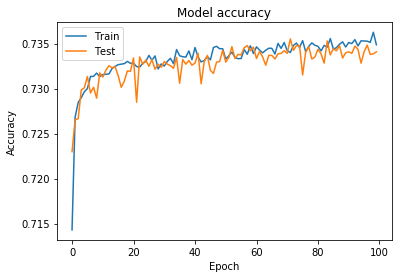

In [89]:
acc_2 = model_test(model_2)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Now we will compile the third model_3 with neural networks. And fit model based on the train data.

In [90]:
#Model compile
model_3 = model_train(optimizer='adam', activation = 'sigmoid')
#Model fit
history_3 = model_3.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 52482 samples, validate on 17494 samples
Epoch 1/100
52482/52482 [==============================] - 3s 58us/sample - loss: 0.5923 - accuracy: 0.7029 - val_loss: 0.5566 - val_accuracy: 0.7269
Epoch 2/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5535 - accuracy: 0.7278 - val_loss: 0.5552 - val_accuracy: 0.7282
Epoch 3/100
52482/52482 [==============================] - 2s 43us/sample - loss: 0.5528 - accuracy: 0.7278 - val_loss: 0.5543 - val_accuracy: 0.7269
Epoch 4/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5523 - accuracy: 0.7291 - val_loss: 0.5539 - val_accuracy: 0.7280
Epoch 5/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5515 - accuracy: 0.7287 - val_loss: 0.5533 - val_accuracy: 0.7271
Epoch 6/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5509 - accuracy: 0.7288 - val_loss: 0.5528 - val_accuracy: 0.7276
Epoch 7/100
52482/52482 [=========================

Epoch 55/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5414 - accuracy: 0.7344 - val_loss: 0.5455 - val_accuracy: 0.7313
Epoch 56/100
52482/52482 [==============================] - 2s 38us/sample - loss: 0.5413 - accuracy: 0.7344 - val_loss: 0.5454 - val_accuracy: 0.7330
Epoch 57/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5414 - accuracy: 0.7342 - val_loss: 0.5454 - val_accuracy: 0.7317
Epoch 58/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5411 - accuracy: 0.7336 - val_loss: 0.5460 - val_accuracy: 0.7336
Epoch 59/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5412 - accuracy: 0.7341 - val_loss: 0.5455 - val_accuracy: 0.7314
Epoch 60/100
52482/52482 [==============================] - 2s 38us/sample - loss: 0.5411 - accuracy: 0.7335 - val_loss: 0.5449 - val_accuracy: 0.7323
Epoch 61/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5411 - ac

The accuracy of model_3 and the graph of accuracy of test and train is given bellow:

Accuracy is: 73.32228192523151


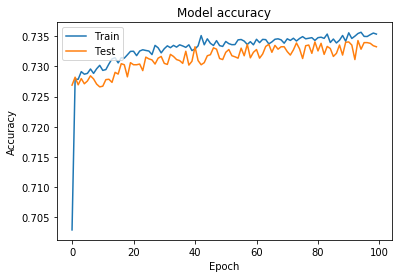

In [91]:
acc_3 = model_test(model_3)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Now we will compile the fourth model_4 with neural networks. And fit model based on the train data.

In [92]:
#Model compile
model_4 = model_train(optimizer='RMSprop', activation = 'relu')
#Model fit
history_4 = model_4.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 52482 samples, validate on 17494 samples
Epoch 1/100
52482/52482 [==============================] - 4s 71us/sample - loss: 0.5807 - accuracy: 0.7053 - val_loss: 0.5576 - val_accuracy: 0.7276
Epoch 2/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5500 - accuracy: 0.7297 - val_loss: 0.5544 - val_accuracy: 0.7290
Epoch 3/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5473 - accuracy: 0.7306 - val_loss: 0.5519 - val_accuracy: 0.7282
Epoch 4/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5458 - accuracy: 0.7321 - val_loss: 0.5509 - val_accuracy: 0.7278
Epoch 5/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5450 - accuracy: 0.7322 - val_loss: 0.5503 - val_accuracy: 0.7311
Epoch 6/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5443 - accuracy: 0.7327 - val_loss: 0.5487 - val_accuracy: 0.7316
Epoch 7/100
52482/52482 [=========================

Epoch 55/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5405 - accuracy: 0.7360 - val_loss: 0.5459 - val_accuracy: 0.7337
Epoch 56/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5403 - accuracy: 0.7351 - val_loss: 0.5459 - val_accuracy: 0.7355
Epoch 57/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5404 - accuracy: 0.7354 - val_loss: 0.5457 - val_accuracy: 0.7339
Epoch 58/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5403 - accuracy: 0.7358 - val_loss: 0.5457 - val_accuracy: 0.7336
Epoch 59/100
52482/52482 [==============================] - 2s 40us/sample - loss: 0.5401 - accuracy: 0.7358 - val_loss: 0.5464 - val_accuracy: 0.7333
Epoch 60/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5403 - accuracy: 0.7352 - val_loss: 0.5460 - val_accuracy: 0.7335
Epoch 61/100
52482/52482 [==============================] - 2s 39us/sample - loss: 0.5403 - ac

The accuracy of model_4 and the graph of accuracy of test and train is given bellow:

Accuracy is: 73.51663427460844


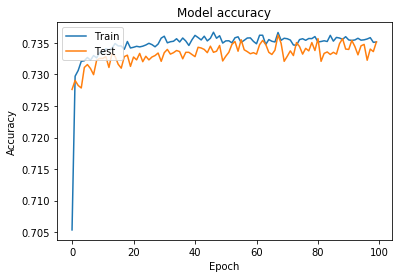

<Figure size 432x288 with 0 Axes>

In [94]:
acc_4 = model_test(model_4)
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
fig = plt.figure()
plt.show()

From previous models we can see that the last one model_4 is the best model prediction because it has the best accuracy. So, we will use this model for prediction future observation. This model has optimizer='RMSprop', activation = 'relu'. 

# Prediction Future Observation

In this section we will take one new randomly selected examinee whose data is different from the data in the historical data set. 
For this examinee we will predict if he will have cardio desease or not using our prediction model model_4. 

First we need to randomly select the features data for this examinee. 

In [132]:
data_new = {} #We need to create a dictionary with all columns like in initial dataset
while True:
    age_new = random.randint(12170, 23713)
    gender_new = random.randint(0,1)
    height_new = random.uniform(142.5, 186.5)
    weight_new = np.log(np.log(random.randint(10,200)))
    ap_hi_new = random.randint(90,170)
    ap_lo_new = random.randint(65,105)
    cholesterol_new = random.randint(1,3)
    gluc_new = random.randint(1,3)
    if ((not age_new in df.age) & 
        (not height_new in df.height) &
        ((not weight_new in df.weight_log) & (1.35 < weight_new < 1.56))
       ):
        data_new['age'] = [age_new]
        data_new['gender'] = [gender_new]
        data_new['height'] = [height_new]
        data_new['weight'] = [weight_new]
        data_new['ap_hi'] = [ap_hi_new]
        data_new['ap_lo'] = [ap_lo_new]
        data_new['cholesterol'] = [cholesterol_new]
        data_new['gluc'] = [gluc_new]
        break
        
print(data_new)
        

{'age': [21784], 'gender': [0], 'height': [186.22259168197496], 'weight': [1.4289675858306226], 'ap_hi': [106], 'ap_lo': [103], 'cholesterol': [3], 'gluc': [3]}


Now we need to prepare this data in pandas dataframe as follows for better visualization. 

In [143]:
df_new_data = pd.DataFrame(data_new)
df_new_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
0,21784,0,186.222592,1.428968,106,103,3,3


But in order to predict target feature we need to prepare data for prediction in numpy array:

In [144]:
df_new_data_np = df_new_data.values
df_new_data_np

array([[2.17840000e+04, 0.00000000e+00, 1.86222592e+02, 1.42896759e+00,
        1.06000000e+02, 1.03000000e+02, 3.00000000e+00, 3.00000000e+00]])

The data which we want predict must be in the same shape as the input data for model creation. 
So, we need to standardize our data in order to keep the variables within the same range of values. 

In [145]:
df_new_data_np = sc.fit_transform(df_new_data_np)
df_new_data_np

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

And the last step is to predict the probability that examinee will not have cardio desease. 


In [156]:
pred_new_value = model_4.predict(df_new_data_np)
pred_new_value[0][0]

0.54354334

Conclusion: 

As we can see probability that this randomly selected examinee will not have cardio desease is 0.5435. Since, this probability is larger than 0.5 and we only have two categories we can say that he belongs to group 0, e.c to group of people which don't have cardio desease. 